In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import io

## Gathering


1. First table is for The WeRateDogs Twitter archive named df_archive. It was given to us via a link and is programatically opened as shown

In [2]:
df_archive=pd.read_csv('twitter-archive-enhanced.csv')


2. Second table is for downloading image prediction data programatically using the requests library from udacity servers and stored in folder called image_prediction. This table will contain breed predictions for each dog

In [3]:
# download a file using requests
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [4]:
#Convert text data from requests object to dataframe with pandas
image_prediction = pd.read_csv(io.StringIO(response.text),sep='\t')

In [5]:
print('STATUS_CODE: ', response.status_code)

STATUS_CODE:  200


In [6]:
print('Tweet_page content:\n ', response.content)

Tweet_page content:
  b"tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog\n666020888022790149\thttps://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg\t1\tWelsh_springer_spaniel\t0.465074\tTrue\tcollie\t0.156665\tTrue\tShetland_sheepdog\t0.0614285\tTrue\n666029285002620928\thttps://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg\t1\tredbone\t0.506826\tTrue\tminiature_pinscher\t0.07419169999999999\tTrue\tRhodesian_ridgeback\t0.07201\tTrue\n666033412701032449\thttps://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg\t1\tGerman_shepherd\t0.596461\tTrue\tmalinois\t0.13858399999999998\tTrue\tbloodhound\t0.11619700000000001\tTrue\n666044226329800704\thttps://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg\t1\tRhodesian_ridgeback\t0.408143\tTrue\tredbone\t0.360687\tTrue\tminiature_pinscher\t0.222752\tTrue\n666049248165822465\thttps://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg\t1\tminiature_pinscher\t0.560311\tTrue\tRottweiler\t0.243682\tTrue\tDoberman\t0.154629\tTrue\n666050758794694657\t

The response content can be passed to a BeautifulSoup() method to obtain a soup object which looks very structured.

In [7]:
soup_object = BeautifulSoup(response.content)

/opt/conda/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /opt/conda/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [8]:
soup_object

<html><body><p>tweet_id	jpg_url	img_num	p1	p1_conf	p1_dog	p2	p2_conf	p2_dog	p3	p3_conf	p3_dog
666020888022790149	https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg	1	Welsh_springer_spaniel	0.465074	True	collie	0.156665	True	Shetland_sheepdog	0.0614285	True
666029285002620928	https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg	1	redbone	0.506826	True	miniature_pinscher	0.07419169999999999	True	Rhodesian_ridgeback	0.07201	True
666033412701032449	https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg	1	German_shepherd	0.596461	True	malinois	0.13858399999999998	True	bloodhound	0.11619700000000001	True
666044226329800704	https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg	1	Rhodesian_ridgeback	0.408143	True	redbone	0.360687	True	miniature_pinscher	0.222752	True
666049248165822465	https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg	1	miniature_pinscher	0.560311	True	Rottweiler	0.243682	True	Doberman	0.154629	True
666050758794694657	https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg	1	Bernese_mountain_dog	0.651137	Tr

3. Third table tweet_df is downloaded programmatically from twitter's API using tweepy, then saved to a JSON file, stored in a dictionary, then loaded into a pandas DataFrame.

In [9]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
import tweepy
import json
from timeit import default_timer as timer
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
#create an API object using tweepy.API to query twitter API
api = tweepy.API(auth_handler=auth, parser=tweepy.parsers.JSONParser(), wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [10]:
#writing JSON data of all the tweets in df to tweet_json.txt
##sourced from UDACITY
query = False
count=0
start_time = timer()
if query:
    with open('tweet-json.txt','w') as file:
        for id in df_archive.tweet_id:
            count += 1
            print(str(count) + ": " + str(df_archive.tweet_id))  
            try:
                tweet = api.get_status(id, tweet_mode='extended')
                file.write(json.dumps(tweet) + '\n')
            except Exception as e:
                print('No tweet found for {} with error message {}'.format(str(id),str(e)))
end_time = timer()
print('Process complete in {} seconds'.format(end_time - start_time))

Process complete in 0.00015264399996794964 seconds


In [11]:
# extract data from tweet_json.txt file and load it into dataframe
tweets_df = pd.DataFrame(columns = ['tweet_id', 'retweet_count','favorite_count','timestamp'])
with open('tweet-json.txt','r') as file:
    for line in file:
        json_data = json.loads(line)
        tweet_id = json_data['id_str']
        retweet_count = json_data['retweet_count']
        favorite_count = json_data['favorite_count']
        timestamp = json_data['created_at']
        tweets_df = tweets_df.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count,timestamp]], 
                                                  columns=['tweet_id','retweet_count','favorite_count','timestamp']))
tweets_df = tweets_df.reset_index(drop=True)

In [12]:
#save dataframe
tweets_df.to_csv('df_tweets.csv')

### Assessing
#### Visual assessment
> We assess data in two ways, visually and programatically inorder to check for quality and tidiness issues. We start with visual assessment followed by programmatic

> We have dataframes df_archive, image_prediction and tweets_df

In [13]:
#setting variable column width for 
##each column will be just as big as it needs 
##to be in order to fully display it's content
pd.set_option('display.max_colwidth', 0)

In [14]:
#dataframe for file with retrieved data for weratedogs
df_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1297,707776935007539200,NaN,NaN,2016-03-10 03:55:45 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sadie. She's a Bohemian Rhapsody. Remarkably portable. Could sneak on roller coasters with (probably). 11/10 https://t.co/DB8fyeDs8B,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707776935007539200/photo/1,11,10,Sadie,None,None,None,None
818,770743923962707968,NaN,NaN,2016-08-30 22:04:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t…,7.392382e+17,4.196984e+09,2016-06-04 23:31:25 +0000,https://twitter.com/dog_rates/status/739238157791694849/video/1,13,10,None,doggo,None,None,None
835,768193404517830656,NaN,NaN,2016-08-23 21:09:14 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Gerald. He's a fairly exotic doggo. Floofy af. Inadequate knees tho. Self conscious about large forehead. 8/10 https://t.co/WmczvjCWJq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/768193404517830656/photo/1,8,10,Gerald,doggo,None,None,None
2213,668567822092664832,NaN,NaN,2015-11-22 23:12:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Marvin. He can tie a bow tie better than me. 11/10 https://t.co/81kzPgqjQ3,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668567822092664832/photo/1,11,10,Marvin,None,None,None,None
541,806242860592926720,NaN,NaN,2016-12-06 21:04:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Dave. He's currently in a predicament. Doesn't seem to mind tho. 12/10 someone assist Dave https://t.co/nfprKAXqwu,7.833346e+17,4.196984e+09,2016-10-04 15:55:06 +0000,"https://twitter.com/dog_rates/status/783334639985389568/photo/1,https://twitter.com/dog_rates/status/783334639985389568/photo/1,https://twitter.com/dog_rates/status/783334639985389568/photo/1,https://twitter.com/dog_rates/status/783334639985389568/photo/1,https://twitter.com/dog_rates/status/783334639985389568/photo/1,https://twitter.com/dog_rates/status/783334639985389568/photo/1",12,10,Dave,None,None,None,None
123,868880397819494401,NaN,NaN,2017-05-28 17:23:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Walter. He won't start hydrotherapy without his favorite floatie. 14/10 keep it pup Walter https://t.co/r28jFx9uyF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/868880397819494401/photo/1,14,10,Walter,None,None,None,None
423,821765923262631936,NaN,NaN,2017-01-18 17:07:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Duchess. She uses dark doggo forces to levitate her toys. 13/10 magical af https://t.co/maDNMETA52,NaN,NaN,NaN,https://twitter.com/dog_rates/status/821765923262631936/photo/1,13,10,Duchess,doggo,None,None,None
1736,679722016581222400,NaN,NaN,2015-12-23 17:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Mike. He is a Jordanian Frito Pilates. Frowning because he can't see directly in front of him. 8/10 https://t.co/NL5QJwdEpF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679722016581222400/photo/1,8,10,Mike,None,None,None,None
1472,693942351086120961,NaN,NaN,2016-01-31 23:42:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Kobe. He's a Speckled Rorschach. Requests that someone holds his hand during car rides. 10/10 sick interior https://t.co/LCA6Fr3X2M,NaN,NaN,NaN,https://twitter.com/dog_rate

In [15]:
#dataframe for file with breed predictions for each dog
image_prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1614,802239329049477120,https://pbs.twimg.com/media/CyIgaTEVEAA-9zS.jpg,2,Eskimo_dog,0.482498,True,Siberian_husky,0.335774,True,malamute,0.134589,True
141,668567822092664832,https://pbs.twimg.com/media/CUc64knWoAkZt70.jpg,1,Shih-Tzu,0.985649,True,Lhasa,0.007078,True,Pekinese,0.003053,True
812,692530551048294401,https://pbs.twimg.com/media/CZxc3G7WEAAM4Mv.jpg,1,Siberian_husky,0.486428,True,Eskimo_dog,0.448518,True,white_wolf,0.041506,False
971,706593038911545345,https://pbs.twimg.com/media/Cc5Snc7XIAAMidF.jpg,1,four-poster,0.696423,False,quilt,0.189312,False,pillow,0.029409,False
2064,890006608113172480,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True
1191,739932936087216128,https://pbs.twimg.com/media/CkTFEe-W0AA90m1.jpg,1,redbone,0.243904,True,beagle,0.210975,True,vizsla,0.076443,True
512,676215927814406144,https://pbs.twimg.com/media/CWJmzNsWUAE706Z.jpg,1,hamster,0.999484,False,guinea_pig,0.000158,False,broccoli,0.000061,False
1279,750117059602808832,https://pbs.twimg.com/media/Cmjzc-oWEAESFCm.jpg,2,Shih-Tzu,0.814405,True,Lhasa,0.175220,True,Pekinese,0.008072,True
1187,739485634323156992,https://pbs.twimg.com/media/CkMuP7SWkAAD-2R.jpg,2,Walker_hound,0.640256,True,English_foxhound,0.229799,True,beagle,0.037754,True
190,669393256313184256,https://pbs.twimg.com/media/CUopnHPVEAAcL2o.jpg,1,cocker_spaniel,0.359843,True,Blenheim_spaniel,0.139519,True,toy_poodle,0.132746,True


In [16]:
#dataframe for extracted data from tweet_json.txt file
tweets_df.sample(5)

,tweet_id,retweet_count,favorite_count,timestamp
1669,681297372102656000,902,3078,Mon Dec 28 02:15:26 +0000 2015
1016,744223424764059648,345,1590,Sat Jun 18 17:41:06 +0000 2016
1476,692158366030913536,751,2057,Wed Jan 27 01:33:08 +0000 2016
664,788552643979468800,6970,0,Wed Oct 19 01:29:35 +0000 2016
350,829011960981237760,15776,51915,Tue Feb 07 17:00:28 +0000 2017


#### Quality (visual)
> For the **df_archive table**: 

- Missing values in the in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns.
- Some dog names have default name None

> For **image_prediction table**:

- Lower case and upper case dog names 
- Underscores between dog names
- Non existent dog breed types in say column p1(with unresponsive urls)

#### Tidiness
> For the **df_archive table**: 

- Two values of same datatype in timestamp column i.e. date and time
- Different dog types(doggo, floofer, puppo and pupper) as column headers and not column values
- merge tweets_df DataFrame to df_archive table
- link to tweet is in the text column and should have its own column.

### Programmatic assessment
> **We look at the df_archive table first**

In [17]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

 - tweet_id should be string (object) instead of int64
 - timestamp need have dtype datetime rather than object
 - From our visual assessment (and again empasized in programmatic assessment) we identified missing values (NaN) in the in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns. These features appear to be unique identifiers and wont be used in our analysis since we shall rely on tweet_id for unique identification
 - Expanded urls are are short by 59 data points. It is observed that the tweet link in the text column matches with that of the expanded_url column for each row. 
 

> By visual assessment, some numerators were greater than the denominator. This seems to be a quality error made by the user in severe affection of an image tweeted. Also some denominators weren't the common value of 10. Lets explore the rating_numerator and rating_denominator columns

In [18]:
df_archive.rating_numerator.value_counts().sort_index(ascending=True)

0       2  
1       9  
2       9  
3       19 
4       17 
5       37 
6       32 
7       55 
8       102
9       158
10      461
11      464
12      558
13      351
14      54 
15      2  
17      1  
20      1  
24      1  
26      1  
27      1  
44      1  
45      1  
50      1  
60      1  
75      2  
80      1  
84      1  
88      1  
99      1  
121     1  
143     1  
144     1  
165     1  
182     1  
204     1  
420     2  
666     1  
960     1  
1776    1  
Name: rating_numerator, dtype: int64

- Most values lie between 10 and 14. The rest above 14 seem to be outliers

In [19]:
#lets check numerator values above 14
df_archive.query('rating_numerator > 14')[['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
55,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,17,10
188,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10
189,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10
285,RT @KibaDva: I collected all the good dogs!! 15/10 @dog_rates #GoodDogs https://t.co/6UCGFczlOI,15,10
290,@markhoppus 182/10,182,10
291,@bragg6of8 @Andy_Pace_ we are still looking for the first 15/10,15,10
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7


- It can be seen here that there are accuracy errors in the rating_numerator for example 26 in the rating numerator column instead of 11.26, 75 instead of 9.75, 27 instead of 11.27, 50 instead of 11

In [20]:
df_archive.rating_denominator.value_counts().sort_index(ascending=True)

0      1   
2      1   
7      1   
10     2333
11     3   
15     1   
16     1   
20     2   
40     1   
50     3   
70     1   
80     2   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
Name: rating_denominator, dtype: int64

- Most values lying outside of 10 are outliers due to errors

In [21]:
#lets see for denominator values greater than 10
df_archive.query('rating_denominator > 10')[['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80


- It can be seen here that there are accuracy errors relating rating in-text and numerator and denominator values for example in the rows with row numbers **342, 1068, 1165, 1202 1662**

> By visual assessment, some dog names are written in lowercase entirely, others in upper case, and others with uppercase letters for the first letter of each name
- Some dog names are written as None

In [22]:
#check for the counts of unique values of title cased names
df_archive.name.str.istitle().value_counts()

True     2241
False    115 
Name: name, dtype: int64

In [23]:
#check for the names that are not title cased
y=list(filter(lambda x: x.istitle()==False, df_archive['name']))
np.unique(np.array(y))

array(['BeBe', 'CeCe', 'DayZ', 'DonDon', 'JD', 'a', 'actually', 'all',
       'an', 'by', 'getting', 'his', 'incredibly', 'infuriating', 'just',
       'life', 'light', 'mad', 'my', 'not', 'officially', 'old', 'one',
       'quite', 'space', 'such', 'the', 'this', 'unacceptable', 'very'], 
      dtype='<U12')

- Some names appear mis-written. E.g. **BeBe, CeCe, DayZ, DonDon**. As an accuracy error this should be looked into

In [24]:
#check for the names written in lowercase
x = list(filter(lambda x: x.islower(), df_archive['name']))
np.unique(np.array(x))

array(['a', 'actually', 'all', 'an', 'by', 'getting', 'his', 'incredibly',
       'infuriating', 'just', 'life', 'light', 'mad', 'my', 'not',
       'officially', 'old', 'one', 'quite', 'space', 'such', 'the', 'this',
       'unacceptable', 'very'], 
      dtype='<U12')

In [25]:
#check for names written in uppercase
list(filter(lambda x: x.isupper(), df_archive['name']))

['O', 'JD']

In [26]:
#filter out rows where name is None
df_archive.query('name=="None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388333682689/photo/1,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217045368832/video/1,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392804085760/photo/1,12,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/885517367337512960,14,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a corgi undercover as a malamute. Pawbably doing important investigative work. Zero control over tongue happenings. 13/10 https://t.co/44ItaMubBf,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1",13,10,None,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""n

In [27]:
#source table seems cluttered and may not be of use here
df_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

> **Next we look at the image_prediction table**

In [28]:
#image_prediciton info
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
#descriptive stats
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [30]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
tweet_id          2331 non-null object
retweet_count     2331 non-null object
favorite_count    2331 non-null object
timestamp         2331 non-null object
dtypes: object(4)
memory usage: 72.9+ KB


### Issues

**df_archive**

- Missing values in the in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns.
- link to tweet is in the text column and should have its own column.
- Some dog names have default name None and some names are inaccurate
- tweet_id should be string (object) instead of int64
- timestamp need have dtype datetime rather than object
- Expanded urls are are short by 59 data points.
- Accuracy errors in the rating_numerator for example 26 in the rating numerator column instead of 11.26, 75 instead of 9.75, 27 instead of 11.27, 50 instead of 11
- accuracy errors relating rating in-text and numerator and denominator values for example in the rows with row numbers 342, 1068, 1165, 1202 1662
- Some dog names are written in lowercase entirely, others in upper case, and others with uppercase letters for the first letter of each name
- columns *doogo, floofer, pupper and pupppo* have values None instead of Null
- source table looks cluttered

**image_prediction**
- tweet_id should be string (object) instead of int64
- dog names in columns p1 p2 p3 require title cased characters

### Tidiness

**df_archive**
- Different dog types(doggo, floofer, puppo and pupper) as column headers and not column values
- merge tweets_df DataFrame to df_archive table

**image_prediction**
- confidence headers **p1_conf, p2_conf, p3_conf** can be column values under the column header confidence
- dog type headers **p1, p1_dog, p2, p2_dog, p3, p3_dog** can be column values under one column header dog_breed

## Cleaning
Make copies of all three dataframes

In [31]:
df_archive_copy = df_archive.copy()
image_pred_copy = image_prediction.copy()
tweets_df_copy = tweets_df.copy()

### Define
1. Remove Missing values in the in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns from the df_archive_copy dataframe and keeping only original tweets


### Clean

In [32]:
x = df_archive_copy[pd.notnull(df_archive_copy.in_reply_to_user_id)].index
y = df_archive_copy[pd.notnull(df_archive_copy.retweeted_status_user_id)].index

In [33]:
df_archive_copy.drop(index = x, inplace=True)
df_archive_copy.drop(index = y, inplace=True)

### Test

In [34]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

### Define.
2. delete NaN values from df_archive_copy

### Clean

In [35]:
df_archive_copy.dropna(axis=1, how='any', inplace=True) 
pd.set_option('display.max_colwidth', 0)

### Test

In [36]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(8)
memory usage: 196.6+ KB


### Define
3. separate tweet urls from tweet text in text column into a column image_url and create a column for the tweet text separated from the url into a column **text_only.**. Drop the **text** column.

### Clean

In [37]:
df_archive_copy['image_url'] = df_archive_copy.text.str.extract('(\w+\S\/\/\w[\.*\D\d\/*]+)', expand=True)
df_archive_copy['text_only'] = df_archive_copy.text.str.replace('(\w+\S\/\/\w[\.*\D\d\/*]+)',"",regex=True)
pd.set_option('display.max_colwidth', 0)

In [38]:
#drop the text column
df_archive_copy.drop('text',inplace=True,axis=1)

### Test

In [39]:
df_archive_copy.sample(5)


,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,image_url,text_only
269,841320156043304961,2017-03-13 16:08:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",12,10,None,None,None,None,None,https://t.co/cEORXhwZ5K,"We don't rate penguins, but if we did, this one would get 12/10"
143,864197398364647424,2017-05-15 19:14:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",13,10,Paisley,None,None,None,None,https://t.co/cPq9fYvkzr,This is Paisley. She ate a flower just to prove she could. Savage af. 13/10 would pet so well
1726,680055455951884288,2015-12-24 16:00:30 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",10,10,Sammy,None,None,None,None,https://t.co/MQfPK4zwuh,"Meet Sammy. At first I was like ""that's a snowflake. we only rate dogs,"" but he would've melted by now, so 10/10"
929,754482103782404096,2016-07-17 01:05:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",10,10,Milo,None,None,None,None,https://t.co/ca0q9HM8II,This is Milo. He's currently plotting his revenge. 10/10
2301,667044094246576128,2015-11-18 18:17:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",12,10,None,None,None,None,None,https://t.co/QZAnwgnOMB,12/10 gimme now


### Define (Tidiness)
 4. There are some tweets that contain more than one dog stage eg doggo,fluffer

### Clean

In [40]:
# handle none
df_archive_copy.doggo.replace('None', '', inplace=True)
df_archive_copy.floofer.replace('None', '', inplace=True)
df_archive_copy.pupper.replace('None', '', inplace=True)
df_archive_copy.puppo.replace('None', '', inplace=True)

# merge into column
df_archive_copy['dog_type'] = df_archive_copy.doggo + df_archive_copy.floofer + df_archive_copy.pupper + df_archive_copy.puppo

# handle multiple stages
df_archive_copy.loc[df_archive_copy.dog_type == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
df_archive_copy.loc[df_archive_copy.dog_type == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
df_archive_copy.loc[df_archive_copy.dog_type == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# handle missing values
df_archive_copy.loc[df_archive_copy.dog_type == '', 'dog_type'] = np.nan


### Test

In [107]:
df_archive_copy.dog_type.value_counts()

 pupper      146
doggo        53 
 puppo       28 
 floofer     3  
Name: dog_type, dtype: int64

### Define
**5. Fixing datatypes**

> tweet_id should be string (object) instead of int64 (in df_archive_copy and tweet_df)

> timestamp need have dtype datetime rather than object

### Clean


In [41]:
df_archive_copy['tweet_id'] = df_archive_copy['tweet_id'].astype('str')
df_archive_copy['timestamp'] = pd.to_datetime(df_archive_copy['timestamp'],errors='coerce')
tweets_df['tweet_id'] = tweets_df['tweet_id'].astype('str')

### Test

In [42]:
df_archive_copy.info()
print('\n')
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
image_url             2094 non-null object
text_only             2097 non-null object
dog_type              336 non-null object
dog_stage             11 non-null object
dtypes: datetime64[ns](1), int64(2), object(11)
memory usage: 245.7+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
tweet_id          2331 non-null object
retweet_count     2331 non-null object
favorite_count    2331 non-nul

### Define (tidiness)
6. Different dog types(doggo, floofer, puppo and pupper) as column headers and not row values. create a column named **dog_type** for the four row values

### Clean

In [43]:
df_archive_copy['dog_type']= df_archive_copy.text_only.str.extract('(doggo | floofer | pupper | puppo)', expand = True)
#drop columns 
df_archive_copy.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace=True)
#df_archive_copy = pd.melt(df_archive_copy, id_vars =['tweet_id','timestamp','source', 'rating_numerator','rating_denominator','name',
#                       'image_url','text_only'],
#                     value_vars = ['doggo', 'floofer', 'pupper', 'puppo'],
#                     var_name = 'dog_type', 
#                    value_name = 'value').query('value != "None"')



### Test

In [44]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
image_url             2094 non-null object
text_only             2097 non-null object
dog_type              232 non-null object
dog_stage             11 non-null object
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 180.2+ KB


### Define
7. Condense columns headers **p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog** to row values under; confidence for p1_conf, p2_conf, p3_conf; dog_breed for p1, p2, p3 and dorrop,,,,,,,,,,,,,,,,,,, all irrelevnat columns

### Clean

In [45]:
breed = []
confidence = []

# define the function
def dog(data):
    if data.p1_dog:
        breed.append(data.p1)
        confidence.append(data.p1_conf)
        
    elif data.p2_dog:
        breed.append(data.p2)
        confidence.append(data.p2_conf)
        
    elif data.p3_dog :
        breed.append(data.p3)
        confidence.append(data.p3_conf)
    else:
        breed.append('No_breed')
        confidence.append(0)
# apply the function row wise        
image_pred_copy.apply(dog,axis =1)
# new column names
image_pred_copy['dog_breed'] = breed
image_pred_copy['confidence'] = confidence

# drop the pertinent columns now
image_pred_copy.drop(columns = ['p1', 'p1_dog', 'p1_conf' , 'p2', 'p2_dog',
                                 'p2_conf' , 'p3', 'p3_dog', 'p3_conf'],axis=1, inplace =True)
# rename the No_breed values with np.nan
image_pred_copy.replace('No_breed',np.nan, inplace=True)
# replace the underscore with space and title all breeds values
image_pred_copy.dog_breed= image_pred_copy.dog_breed.str.replace('_',' ').str.title()


### Test

In [46]:
image_pred_copy.sample(5)

,tweet_id,jpg_url,img_num,dog_breed,confidence
857,696877980375769088,https://pbs.twimg.com/media/CavO0uuWEAE96Ed.jpg,1,NaN,0.000000
72,667211855547486208,https://pbs.twimg.com/media/CUJppKJWoAA75NP.jpg,1,Golden Retriever,0.462556
589,679132435750195208,https://pbs.twimg.com/media/CWzDWOkXAAAP0k7.jpg,1,Scottish Deerhound,0.194610
635,681231109724700672,https://pbs.twimg.com/media/CXQ4EwQWwAEVaUf.jpg,1,Irish Setter,0.406047
1984,872122724285648897,https://pbs.twimg.com/media/DBpm-5UXcAUeCru.jpg,1,Pug,0.066736


### Define
8. matching in-text ratings under the text_only column header to ratings under the rating numerator and rating denominator column header.

### Clean
[Link to source code](https://kanoki.org/2019/11/12/how-to-use-regex-in-pandas/)

In [47]:
df_archive_copy.reset_index(inplace=True, drop=True)

#regex for extracting in-text decimal numerators in the text_only column
df_archive_copy[df_archive_copy.text_only.str.contains(r"(\d+\.\d*\/\d+)")==True][['text_only','rating_numerator']]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.


,text_only,rating_numerator
41,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10",5
528,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10",75
586,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back,27
1474,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10,26


Clearly these intext numerators don't match with their respective rating numerators

In [48]:
#lets correct the rating_numerators
df_archive_copy.iloc[41,3]=13.5
df_archive_copy.iloc[598,3]=9.75
df_archive_copy.iloc[586,3]=11.27
df_archive_copy.iloc[1474,3]=11.26

In [49]:
#regex for extracting in-text numerators that 
##match with values in the rating numerators
matching = df_archive_copy[df_archive_copy.text_only.str.contains(r"((\d+\.?\d+)\/(\d+))")==True][['text_only','rating_numerator']]
matching.sample(10)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,text_only,rating_numerator
839,This is Bell. She likes holding hands. 12/10 would definitely pet with other hand,12.0
49,This is Rey. He's a Benebop Cumberfloof. 12/10 dangerously pettable,12.0
1360,"Meet Horace. He was practicing his levitation, minding his own business when a rogue tennis ball spooked him. 10/10",10.0
539,This is Doc. He requested to be carried around like that. 12/10 anything for Doc,12.0
319,"""I wish we were dogs"" 14/10 for @BadlandsNPS",14.0
1162,We only rate dogs. Pls stop sending in non-canines like this Mongolian grass snake. This is very frustrating. 11/10,11.0
910,Say hello to Ollie. He conducts this train. He also greets you as you enter. Kind af. 11/10 would pet so firmly,11.0
212,Meet George. He looks slightly deflated but overall quite powerful. Not sure how that human restrained him. 12/10 would snug with permission,12.0
137,"Here we have perhaps the wisest dog of all. Above average with light sabers. Immortal as h*ck. 14/10 dog, or dog not, there is no try",14.0
1237,This is Archie. He's a Bisquick Taj Mapaw. Too many people are touching him. It is doing him a discomfort. 10/10,10.0


In [50]:
matching.dropna(inplace=True)

In [51]:
extractedall=df_archive_copy.text_only.str.extractall('([0-9][,.]*[0-9]*/\d+)')
extractedall.head(5)


,,0
,match,
0,0,13/10
1,0,13/10
2,0,12/10
3,0,13/10
4,0,12/10


- **str.extractall** captures/extracts all instances that match the regex pattern (0 for the first instance and 1 for the second instance)

In [52]:
extractedall.query("match == 1")


,,0
,match,
588,1,11/10
797,1,7/10
853,1,14/10
948,1,13/10
985,1,11/10
1005,1,8/10
1136,1,2/10
1234,1,13/10
1239,1,5/10


- **extractedall** has an extra "match" column since it captures all instances of our regex pattern (\d+) and stores them in a dataframe. The values in the "match" column indicate the order in which the values were extracted from our series.
- In order to identify the text_only columns with double 'ratings' we qeury text_only row data.

In [53]:
# convert to a list
extractedall.query("match == 1").index.labels

FrozenList([[588, 797, 853, 948, 985, 1005, 1136, 1234, 1239, 1278, 1294, 1307, 1426, 1556, 1592, 1649, 1653, 1719, 1759, 1811, 1860, 1922, 1960, 2005, 2014, 2047, 2076], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [54]:
#here rows with defects that we shall correct and drop others.
df_archive_copy.iloc[[588, 797, 853, 948, 985, 1005, 1136, 1234, 1239, 1278, 1294, 1307, 
                      1426, 1556, 1592, 1649, 1653, 1719, 1759,1811, 
                      1860, 1922, 1960, 2005, 2014, 2047, 2076],[3,4,7]]

,rating_numerator,rating_denominator,text_only
588,12.0,10,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing"
797,10.0,10,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively
853,9.0,11,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP"
948,4.0,20,Happy 4/20 from the squad! 13/10 for all
985,50.0,50,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10
1005,10.0,10,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp
1136,9.0,10,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10
1234,4.0,10,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_)"
1239,10.0,10,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10
1278,5.0,10,When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup


Above we see **11/10** was the ***second instance*** (match index 1) from the 766th string (***series index 776***) in the text_only column. We shall drop these doubles becauase they seen to comment on two dogs as well as to improve the accuracy of our dataframe

In [55]:
#rating misrepresented for 9/11(September 11th)
df_archive_copy.iloc[853, 3] = 14
df_archive_copy.iloc[853, 4] = 10

#rating misrepresented for 4/20 (day of the most high)
df_archive_copy.iloc[948, 3] = 13
df_archive_copy.iloc[948, 4] = 10

#rating misrepresented for 50/50 split
df_archive_copy.iloc[985, 3] = 11
df_archive_copy.iloc[985, 4] = 10

#rating misrepresented for 7/11
df_archive_copy.iloc[1426, 3] = 10
df_archive_copy.iloc[1426, 4] = 10

#rating misrepresented for 3 1/2 legged episcopalian
df_archive_copy.iloc[2076, 3] = 9
df_archive_copy.iloc[2076, 4] = 10


In [56]:
## here we now see only double instances (0 and 1) 
##in the text_only column
doubles = df_archive_copy.iloc[[588, 797, 1005, 1136, 1234, 1239, 1278, 1294, 1307, 
                      1556, 1592, 1649, 1653, 1719, 1759,1811, 
                      1860, 1922, 1960, 2005, 2014, 2047],[3,4,7]]
doubles

,rating_numerator,rating_denominator,text_only
588,12.0,10,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing"
797,10.0,10,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively
1005,10.0,10,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp
1136,9.0,10,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10
1234,4.0,10,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_)"
1239,10.0,10,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10
1278,5.0,10,When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup
1294,10.0,10,This is Eriq. His friend just reminded him of last year's super bowl. Not cool friend\n10/10 for Eriq\n6/10 for friend
1307,11.0,10,Meet Fynn &amp; Taco. Fynn is an all-powerful leaf lord and Taco is in the wrong place at the wrong time. 11/10 &amp; 10/10
1556,10.0,10,"Meet Tassy &amp; Bee. Tassy is pretty chill, but Bee is convinced the Ruffles are haunted. 10/10 &amp; 11/10 respectively"


### Test

In [57]:
df_archive_copy.iloc[[41,853,948,985,1426,2076,528,586,1474],[3,4,7]]

,rating_numerator,rating_denominator,text_only
41,13.50,10,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10"
853,14.00,10,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP"
948,13.00,10,Happy 4/20 from the squad! 13/10 for all
985,11.00,10,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10
1426,10.00,10,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10
2076,9.00,10,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10
528,75.00,10,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10"
586,11.27,10,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back
1474,11.26,10,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10


In [58]:
#drop the double intances
doubles
df_archive_copy.drop(axis=0,index=doubles.index,inplace=True)

In [59]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2096
Data columns (total 10 columns):
tweet_id              2075 non-null object
timestamp             2075 non-null datetime64[ns]
source                2075 non-null object
rating_numerator      2075 non-null float64
rating_denominator    2075 non-null int64
name                  2075 non-null object
image_url             2072 non-null object
text_only             2075 non-null object
dog_type              230 non-null object
dog_stage             11 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 178.3+ KB


### Define
9. get one final score (out of ten) to tidy up dog scores

### Clean

In [60]:
#divide the rating_numerator / rating_denominator and then mulitiply by 10 & make score column
df_archive_copy['score'] = 10 * df_archive_copy.rating_numerator / df_archive_copy.rating_denominator
#drop the columns rating_numerator & rating_denominator column
df_archive_copy.drop(['rating_numerator','rating_denominator'],axis=1,inplace=True)

### Test

In [61]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2096
Data columns (total 9 columns):
tweet_id     2075 non-null object
timestamp    2075 non-null datetime64[ns]
source       2075 non-null object
name         2075 non-null object
image_url    2072 non-null object
text_only    2075 non-null object
dog_type     230 non-null object
dog_stage    11 non-null object
score        2075 non-null float64
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 162.1+ KB


### Define
10. delete timestamp from tweets_df and join with df_archive 

### Clean

In [63]:
tweets_df_copy = tweets_df_copy.drop('timestamp', axis = 1)

In [64]:
tweets_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null object
retweet_count     2331 non-null object
favorite_count    2331 non-null object
dtypes: object(3)
memory usage: 54.7+ KB


In [65]:
#join df_archive_copy to tweets_df_copy
df_merge = tweets_df_copy.merge(df_archive_copy, how = 'left', on = 'tweet_id')

### Test

In [66]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2331 entries, 0 to 2330
Data columns (total 11 columns):
tweet_id          2331 non-null object
retweet_count     2331 non-null object
favorite_count    2331 non-null object
timestamp         2068 non-null datetime64[ns]
source            2068 non-null object
name              2068 non-null object
image_url         2065 non-null object
text_only         2068 non-null object
dog_type          228 non-null object
dog_stage         11 non-null object
score             2068 non-null float64
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 218.5+ KB


### Define
11. create new columns with month and date of date field timestamp

[Link to source code](https://stackoverflow.com/questions/37625334/python-pandas-convert-month-int-to-month-name)

### Clean

In [67]:
## for month name
import calendar
df_merge['month'] = df_merge['timestamp'].dt.strftime('%b')

## extract datename
df_merge['day'] = df_merge['timestamp'].dt.strftime('%a')

##extract date-month
df_merge

,tweet_id,retweet_count,favorite_count,timestamp,source,name,image_url,text_only,dog_type,dog_stage,score,month,day
0,892420643555336193,7328,34924,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Phineas,https://t.co/MgUWQ76dJU,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,NaN,NaN,13.0,Aug,Tue
1,892177421306343426,5472,30240,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Tilly,https://t.co/0Xxu71qeIV,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",NaN,NaN,13.0,Aug,Tue
2,891815181378084864,3620,22761,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Archie,https://t.co/wUnZnhtVJB,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,NaN,NaN,12.0,Jul,Mon
3,891689557279858688,7520,38193,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Darla,https://t.co/tD36da7qLQ,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,NaN,NaN,13.0,Jul,Sun
4,891327558926688256,8083,36463,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Franklin,https://t.co/AtUZn91f7f,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",NaN,NaN,12.0,Jul,Sat
5,891087950875897856,2712,18398,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",None,https://t.co/kQ04fDDRmh,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek,NaN,NaN,13.0,Jul,Sat
6,890971913173991426,1752,10699,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Jax,https://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\n,NaN,NaN,13.0,Jul,Fri
7,890729181411237888,16437,58757,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",None,https://t.co/v0nONBcwxq,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10,NaN,NaN,13.0,Jul,Fri
8,890609185150312448,3761,25313,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Zoey,https://t.co/9TwLuAGH0b,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek,NaN,NaN,13.0,Jul,Thu
9,890240255349198849,6357,28893,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Cassie,https://t.co/t1bfwz5S2A,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate,doggo,NaN,14.0,Jul,Wed


### Test

In [68]:
df_merge.sample(2)

,tweet_id,retweet_count,favorite_count,timestamp,source,name,image_url,text_only,dog_type,dog_stage,score,month,day
1069,737310737551491075,7046,14031,2016-05-30 15:52:33,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",None,https://t.co/wvjqSCN6iC,Everybody stop what you're doing and watch these puppers enjoy summer. Both 13/10,NaN,NaN,13.0,May,Mon
1104,729823566028484608,1179,3801,2016-05-10 00:01:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Stefan,https://t.co/Ebjt6Y4fMh,This is Stefan. He's a downright remarkable pup. 13/10,NaN,NaN,13.0,May,Tue


### Define
12. strip tags and decode HTML entities to plain text, leaving only clear name source in tweets_df_copy1 dataframe and delete the source column

### Clean 
[Link to source code](https://stackoverflow.com/questions/50447559/apply-html-tags-removal-to-pandas-column)

In [69]:
import re
def parser(text):
    return re.sub('<[^<]+?>', '', str(text))
df_merge['new_source'] = df_merge.source.apply(parser)

In [70]:
df_merge.drop(['source'],axis=1,inplace=True)

### Test 

In [71]:
df_merge['new_source'].value_counts()

Twitter for iPhone     1938
nan                    263 
Vine - Make a Scene    91  
Twitter Web Client     29  
TweetDeck              10  
Name: new_source, dtype: int64

In [72]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2331 entries, 0 to 2330
Data columns (total 13 columns):
tweet_id          2331 non-null object
retweet_count     2331 non-null object
favorite_count    2331 non-null object
timestamp         2068 non-null datetime64[ns]
name              2068 non-null object
image_url         2065 non-null object
text_only         2068 non-null object
dog_type          228 non-null object
dog_stage         11 non-null object
score             2068 non-null float64
month             2331 non-null object
day               2331 non-null object
new_source        2331 non-null object
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 255.0+ KB


### Define

13. Missing data should be removed from the merged tables.

### Clean


In [73]:
df_merge_clean=df_merge.copy()

In [74]:
drop1 = df_merge_clean[df_merge_clean.image_url.isnull()].index
drop2 = df_merge_clean[df_merge_clean.retweet_count.isnull()].index

In [75]:
df_merge_clean.drop(drop1, inplace=True)
df_merge_clean.drop(drop2, inplace=True)

### Test

In [76]:
df_merge_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2065 entries, 0 to 2330
Data columns (total 13 columns):
tweet_id          2065 non-null object
retweet_count     2065 non-null object
favorite_count    2065 non-null object
timestamp         2065 non-null datetime64[ns]
name              2065 non-null object
image_url         2065 non-null object
text_only         2065 non-null object
dog_type          228 non-null object
dog_stage         11 non-null object
score             2065 non-null float64
month             2065 non-null object
day               2065 non-null object
new_source        2065 non-null object
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 225.9+ KB


In [77]:
df_merge_clean.isnull().sum()

tweet_id          0   
retweet_count     0   
favorite_count    0   
timestamp         0   
name              0   
image_url         0   
text_only         0   
dog_type          1837
dog_stage         2054
score             0   
month             0   
day               0   
new_source        0   
dtype: int64

In [78]:
# save the three tables with independent observational units
df_archive.to_csv('df_archive.csv', sep=';', index=False)
image_pred_copy.to_csv('image_prediction.csv',sep=';',index=False)
tweets_df.to_csv('tweets.csv',sep=';', index=False)

In [79]:
df_merge_clean.to_csv('twitter_archive_final.csv',sep=';', index=False)

In [80]:
twitter_data = pd.read_csv('twitter_archive_final.csv', sep=';')
prediction_data = pd.read_csv('image_prediction.csv',sep=';')

In [81]:
twitter_data.sample(5)

,tweet_id,retweet_count,favorite_count,timestamp,name,image_url,text_only,dog_type,dog_stage,score,month,day,new_source
673,760539183865880579,3490,7342,2016-08-02 18:14:06,Atlas,https://t.co/9k8LLjJ0uJ,This is Atlas. Swinging is his passion. 12/10 would push all day,NaN,NaN,12.0,Aug,Tue,Twitter for iPhone
1334,687102708889812993,920,2251,2016-01-13 02:43:46,None,https://t.co/A88x73TwMN,Army of water dogs here. None of them know where they're going. Have no real purpose. Aggressive barks. 5/10 for all,NaN,NaN,5.0,Jan,Wed,Twitter for iPhone
547,782969140009107456,7154,23640,2016-10-03 15:42:44,Cali,https://t.co/vOBV1ZqVcX,This is Cali. She arrived preassembled. Convenient af. 12/10 appears to be rather h*ckin pettable,NaN,NaN,12.0,Oct,Mon,Twitter for iPhone
269,831650051525054464,1852,6925,2017-02-14 23:43:18,None,https://t.co/piiX0ke8Z6 https://t.co/1UHrKcaCiO,"I usually only share these on Friday's, but this is Blue. He's a very smoochable pooch who needs your help. 13/10\n\n",NaN,NaN,13.0,Feb,Tue,Twitter for iPhone
1682,673612854080196609,663,1488,2015-12-06 21:19:54,Jeffri,https://t.co/0iyItbtkr8,This is Jeffri. He's a speckled ice pupper. Very lazy. Enjoys the occasional swim. Rather majestic really. 7/10,NaN,NaN,7.0,Dec,Sun,Twitter for iPhone


In [82]:
prediction_data.sample(5)

,tweet_id,jpg_url,img_num,dog_breed,confidence
1811,832998151111966721,https://pbs.twimg.com/media/C49nZavUYAEJjGw.jpg,1,Boxer,0.539036
145,668625577880875008,https://pbs.twimg.com/media/CUdvambWoAA007z.jpg,1,Groenendael,0.054455
508,676098748976615425,https://pbs.twimg.com/media/CWH8L72UkAAvjql.jpg,1,NaN,0.000000
1625,803773340896923648,https://pbs.twimg.com/media/CyeTku-XcAALkBd.jpg,2,Miniature Pinscher,0.817066
848,695446424020918272,https://pbs.twimg.com/media/Caa407jWwAAJPH3.jpg,1,Basenji,0.748904


In [83]:
final_dataset= pd.merge(twitter_data, prediction_data[['tweet_id','img_num','dog_breed','confidence']], on = 'tweet_id', how='left')

In [84]:
final_dataset.to_csv('master.csv', sep=';', index=False)

In [85]:
final_data = pd.read_csv('master.csv', sep=';')

In [86]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2065 entries, 0 to 2064
Data columns (total 16 columns):
tweet_id          2065 non-null int64
retweet_count     2065 non-null int64
favorite_count    2065 non-null int64
timestamp         2065 non-null object
name              2065 non-null object
image_url         2065 non-null object
text_only         2065 non-null object
dog_type          228 non-null object
dog_stage         11 non-null object
score             2065 non-null float64
month             2065 non-null object
day               2065 non-null object
new_source        2065 non-null object
img_num           1942 non-null float64
dog_breed         1638 non-null object
confidence        1942 non-null float64
dtypes: float64(3), int64(3), object(10)
memory usage: 258.2+ KB


In [87]:
##ensuring uniformity in distribution of null values
drop3 = final_data[final_data.dog_breed.isnull()].index
drop4 = final_data[final_data.image_url.isnull()].index

In [88]:
final_data.drop(drop3, inplace=True)
final_data.drop(drop4, inplace=True)

In [89]:
##test
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1638 entries, 1 to 2064
Data columns (total 16 columns):
tweet_id          1638 non-null int64
retweet_count     1638 non-null int64
favorite_count    1638 non-null int64
timestamp         1638 non-null object
name              1638 non-null object
image_url         1638 non-null object
text_only         1638 non-null object
dog_type          184 non-null object
dog_stage         9 non-null object
score             1638 non-null float64
month             1638 non-null object
day               1638 non-null object
new_source        1638 non-null object
img_num           1638 non-null float64
dog_breed         1638 non-null object
confidence        1638 non-null float64
dtypes: float64(3), int64(3), object(10)
memory usage: 217.5+ KB


In [90]:
## change timestamp object datatype to datetime
final_data['timestamp'] = pd.to_datetime(final_data['timestamp'], errors='coerce')
#format="%m/%d/%Y, %H:%M:%S"

### Analysis and Vizualization.
With our cleaned data set let's proceed to perform analysis and visualization on the questions below:

In [91]:
import matplotlib.pyplot as plt
#descriptive stats
final_data.describe()

,tweet_id,retweet_count,favorite_count,score,img_num,confidence
count,1.638000e+03,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000
mean,7.399139e+17,2421.684371,8408.680708,10.893966,1.215507,0.550225
std,6.803793e+16,4380.829674,12298.723025,2.441771,0.576958,0.299202
min,6.660209e+17,11.000000,69.000000,0.000000,1.000000,0.000010
25%,6.776988e+17,547.500000,1951.000000,10.000000,1.000000,0.303879
50%,7.149960e+17,1208.000000,3944.500000,11.000000,1.000000,0.550604
75%,7.932375e+17,2729.500000,10390.750000,12.000000,1.000000,0.821962
max,8.921774e+17,74012.000000,150021.000000,75.000000,4.000000,0.999956


- Each variable initially seems to follow a logical pattern without abnormal outliers sending red flags. For example, the rate_denom the minimum is 7 which makes sense because 0 cannot be the lowest since it's part of a ratio and you cannot divide by zero.
- Even, though some of the numerators in the rate_num column are unneccessarily high and above 10 for the denominator, the rating system for the WeRateDogs feed seems to follow a random rating system. Therefore, this should not draw attention as an issue.
- Also, for the confidence column, the numbers are in the bounds from 0 to 1, which is good because they are confidence intervals and are bound between 0 and 1.

In [92]:
## correlation
final_data.corr()

,tweet_id,retweet_count,favorite_count,score,img_num,confidence
tweet_id,1.000000,0.371289,0.598027,0.411765,0.204043,0.102957
retweet_count,0.371289,1.000000,0.930349,0.235866,0.091590,0.018801
favorite_count,0.598027,0.930349,1.000000,0.307315,0.118822,0.048497
score,0.411765,0.235866,0.307315,1.000000,0.124200,0.117648
img_num,0.204043,0.091590,0.118822,0.124200,1.000000,0.145801
confidence,0.102957,0.018801,0.048497,0.117648,0.145801,1.000000


- The correlation chart is useful for finding connections between variables, especially with hypothesis testing or an A/B test. The numbers range from 0 to 1, and a positive number is a positive correlation and vice versa for a negative number.
- The correlation coefficient beteen retweet_count and favorite_count is 0.930349, which is close to 1 and positive demonstrating a strong positive correlation bewteen those two metrics.

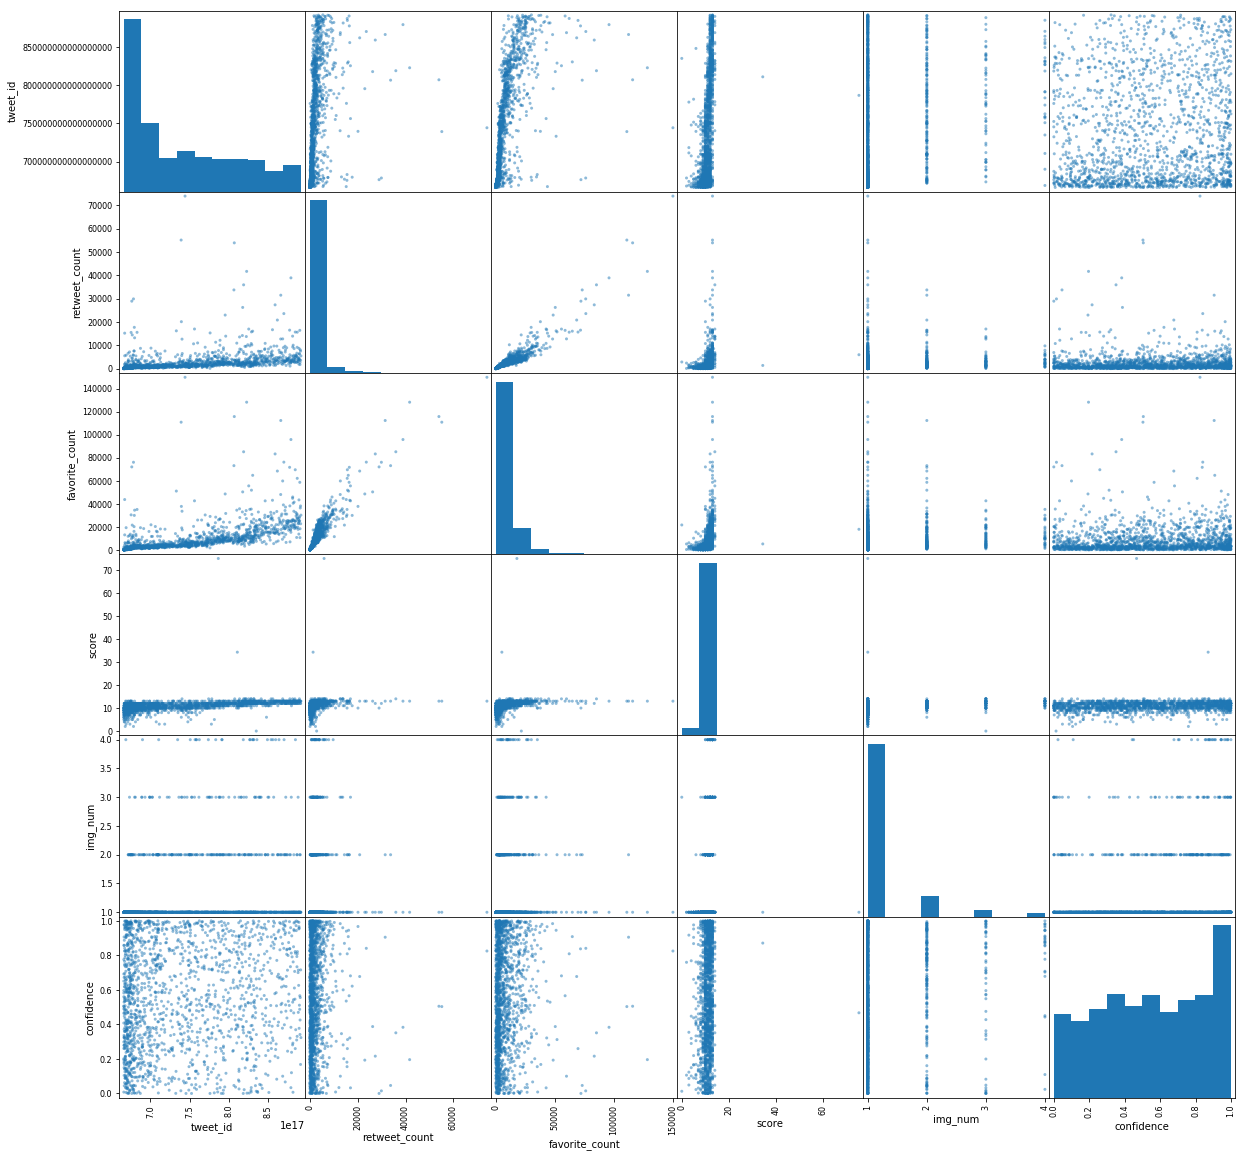

In [93]:
from pandas.plotting import scatter_matrix
scatter_matrix(final_data, figsize=(20,20));

### Most common dog stage

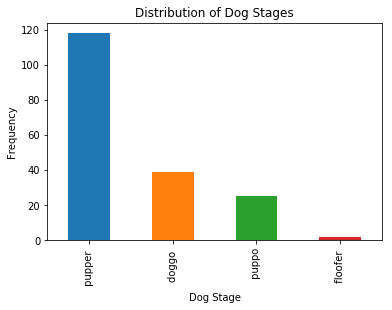

In [94]:
import matplotlib.pyplot as plt
final_data.dog_type.value_counts().plot('bar')
plt.title("Distribution of Dog Stages")
plt.xlabel('Dog Stage')
plt.ylabel('Frequency');

### Most common dog name

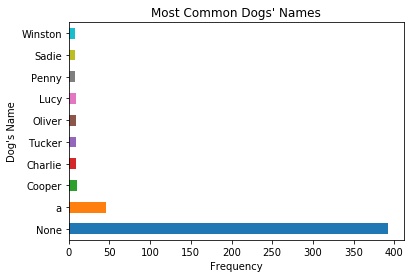

In [95]:
final_data.name.value_counts().sort_values(ascending =False)[:10].plot('barh')
plt.title("Most Common Dogs' Names")
plt.xlabel('Frequency')
plt.ylabel("Dog's Name");

### Day and month with highest dog photo tweets

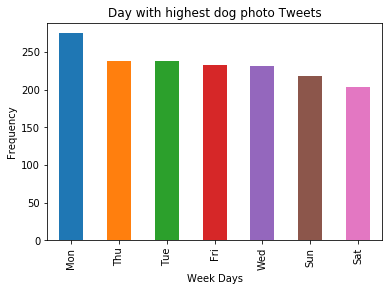

In [96]:
#day
final_data.day.value_counts().plot('bar')
plt.title("Day with highest dog photo Tweets")
plt.xlabel('Week Days')
plt.ylabel('Frequency');

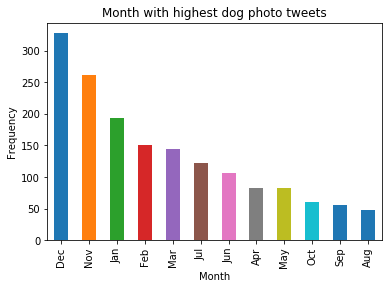

In [97]:
#month
final_data.month.value_counts().plot('bar')
plt.title("Month with highest dog photo tweets")
plt.xlabel('Month')
plt.ylabel('Frequency');

In [98]:
##lets extract month and date from timestamp
#import datetime as dt
#b = final_data['timestamp'].apply(lambda x: x.day*100 + x.month).value_counts()
#final_data['timestamp'].dt.strftime('%m/%d')
#b.sort_values(ascending =False)[:15].plot('bar')
#plt.title("Distribution of Tweets over Day/Month")
#plt.xlabel('Day/Month "ddmm"')
#plt.xticks(rotation = 90)
#plt.ylabel('Frequency');

### Distribution of dog scores 

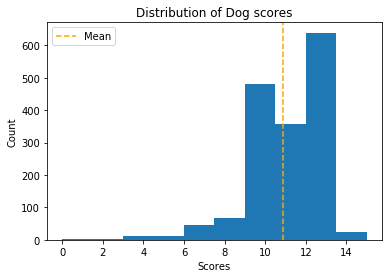

In [99]:

plt.hist(final_data.score,range=[0, 15])
plt.title('Distribution of Dog scores')
plt.xlabel('Scores')
plt.ylabel('Count')
plt.axvline(x= final_data.score.mean(),color='orange', linestyle='--',label ='Mean')
#plt.xticks(bins);
plt.legend(loc=0);


In [100]:
final_data.score.describe()

count    1638.000000
mean     10.893966  
std      2.441771   
min      0.000000   
25%      10.000000  
50%      11.000000  
75%      12.000000  
max      75.000000  
Name: score, dtype: float64

### Most common dog breed

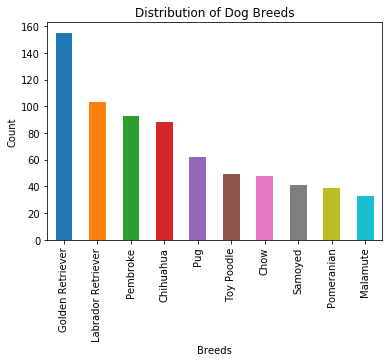

In [101]:
# frequency for dog breeds
final_data.dog_breed.value_counts()[:10].plot('bar')
plt.title('Distribution of Dog Breeds')
plt.xlabel('Breeds')
plt.ylabel('Count');

### Retweets / favorite dog pictures trends
To work with time series data in pandas, we use a DatetimeIndex as the index for our DataFrame (or Series). Let’s see how to do this with our final data. We will explore how retweets and favorites in the WeRateDogs tweets have varied over time, using pandas time series tools to answer questions such as:

- When is retweets and favourites typically highest and lowest?
- How do retweets and tweets vary with seasons of the year?
- What are the long-term trends in retweets and favorites?
- How do retweets compare with favorites, and how has this ratio changed over time?

[Source to Code below](https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/)

In [102]:
#timestamp as our index
final_data = final_data.set_index('timestamp')
final_data.head(3)

,tweet_id,retweet_count,favorite_count,name,image_url,text_only,dog_type,dog_stage,score,month,day,new_source,img_num,dog_breed,confidence
timestamp,,,,,,,,,,,,,,,
2017-08-01 00:17:27,892177421306343426,5472,30240,Tilly,https://t.co/0Xxu71qeIV,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",NaN,NaN,13.0,Aug,Tue,Twitter for iPhone,1.0,Chihuahua,0.323581
2017-07-31 00:18:03,891815181378084864,3620,22761,Archie,https://t.co/wUnZnhtVJB,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,NaN,NaN,12.0,Jul,Mon,Twitter for iPhone,1.0,Chihuahua,0.716012
2017-07-30 15:58:51,891689557279858688,7520,38193,Darla,https://t.co/tD36da7qLQ,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,NaN,NaN,13.0,Jul,Sun,Twitter for iPhone,1.0,Labrador Retriever,0.168086


In [103]:
final_data.tail(3)

,tweet_id,retweet_count,favorite_count,name,image_url,text_only,dog_type,dog_stage,score,month,day,new_source,img_num,dog_breed,confidence
timestamp,,,,,,,,,,,,,,,
2015-11-15 23:21:54,666033412701032449,39,106,a,https://t.co/y671yMhoiR,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af,NaN,NaN,9.0,Nov,Sun,Twitter for iPhone,1.0,German Shepherd,0.596461
2015-11-15 23:05:30,666029285002620928,41,117,a,https://t.co/r7mOb2m0UI,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of,NaN,NaN,7.0,Nov,Sun,Twitter for iPhone,1.0,Redbone,0.506826
2015-11-15 22:32:08,666020888022790149,443,2338,None,https://t.co/BLDqew2Ijj,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet,NaN,NaN,8.0,Nov,Sun,Twitter for iPhone,1.0,Welsh Springer Spaniel,0.465074


We will focus here on downsampling, exploring how it can help us analyze our **WeRateDogs final data** on various time scales. We use the DataFrame’s **resample() method**, which splits the DatetimeIndex into time bins and groups the data by time bin. The resample() method returns a Resampler object, similar to a pandas GroupBy object. We can then apply an aggregation method such as mean(), median(), sum(), etc., to the data group for each time bin.

In [104]:
## 
r = final_data['retweet_count'].resample('W').mean()
f = final_data['favorite_count'].resample('W').mean()
r.head(3)
#final_data['favorite count'].resample('1w').mean()

timestamp
2015-11-15    174.333333
2015-11-22    422.509615
2015-11-29    381.660000
Freq: W-SUN, Name: retweet_count, dtype: float64

Let’s plot the daily retweet_count time series together over a single six-month period to compare them.

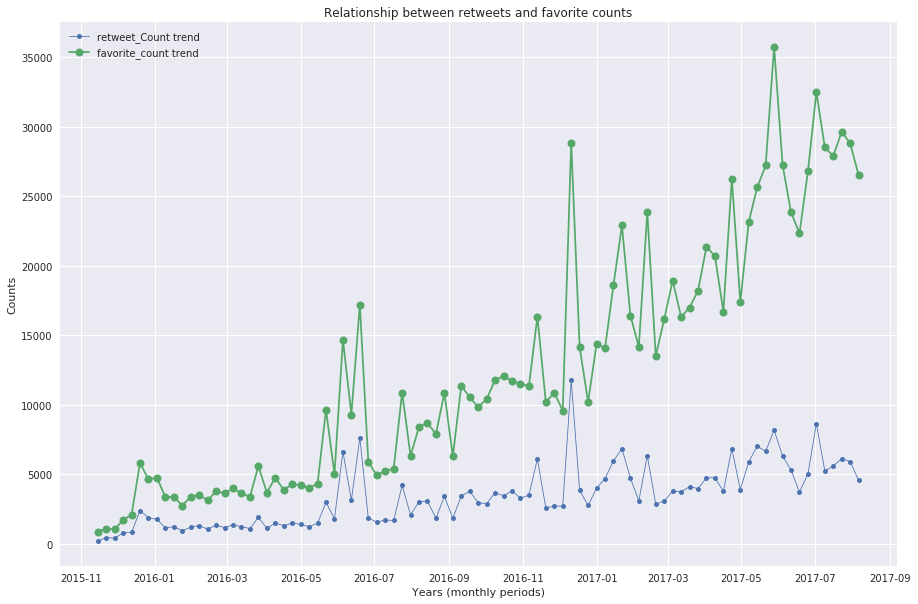

In [105]:
# Start and end of the date range to extract
##start, end = '2017-07', '2016-07'
# Plot daily and weekly resampled time series together
import seaborn as sns
sns.set(rc={'figure.figsize':(15, 10)})
fig, ax = plt.subplots()
ax.plot(r,marker='.', linestyle='-',markersize=10, linewidth=0.8, label='retweet_Count trend')
ax.plot(f,marker='o', markersize=8, linestyle='-', label='favorite_count trend')
ax.set_ylabel('Counts')
ax.set_xlabel('Years (monthly periods)')
ax.set_title('Relationship between retweets and favorite counts')
ax.legend();

- The overall trend of the retweet and favorite counts shows the popularity of this twitter page gradually growing over time.
- As mentioned before, with this timeseries chart above, the favorite_count and retweet_count are positively correlated with one another. This is due to the fact that most people retweet 'tweets' that they like in order for others to see it. It is like 'free advertising' for the 'tweet' itself and shows people on your feed what you're interested in. It's a sharing feature when you want others to see something you've read/seen.
- As shown in the chart, there are 3 peaks, those being, **the middle of spring into summer(twice), and then the Christmas/Holiday time.** This is probably due to the fact that people with dogs are more active in the warmer months, posting cute things their dog is doing outside. Also, during the holidays, they are more likely to share pics/etc about things they care about during this time i.e. their dogs.


In [ ]:
final_data.to_csv ('twitter_archive_master.csv',index = False, header=True)